**Part B: Customer Churn Prediction**

Deliverables

● A data exploration and preprocessing notebook or report that analyzes the dataset, handles missing values, and prepares the data for modeling. (10 Marks)

● A machine learning model capable of predicting customer churn. (20 Marks)

● An evaluation of model performance using appropriate metrics (such as accuracy, precision, recall, F1 score, etc.). (10 Marks)

In [2]:
# Step 1: Import Libraries & Load Data

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Customer_data.csv")  # Replace with your file path if different

# Display first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Step 2: Basic Information

# Dataset shape and info
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe(include='all')

Dataset Shape: (7043, 21)

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Missing Values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies   

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN



Churn Distribution:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


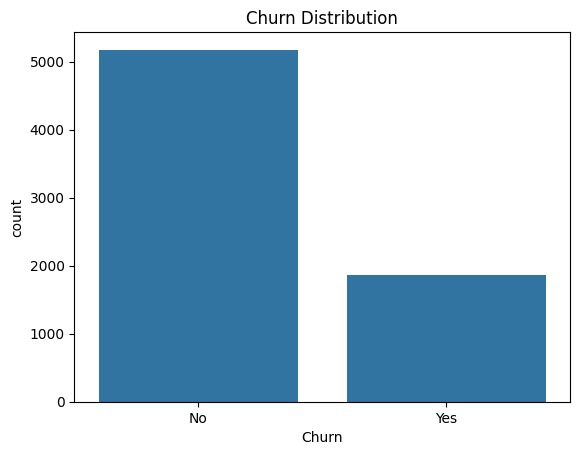

In [4]:
# Step 3: Target Variable Analysis

# Check target column distribution
print("\nChurn Distribution:\n", df['Churn'].value_counts())

# Plot target distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


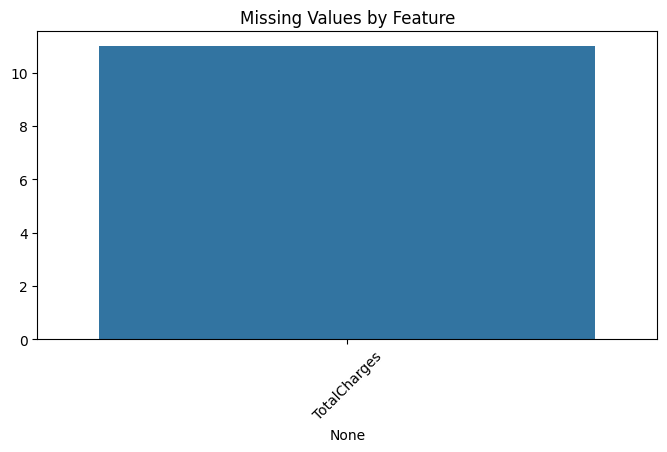

In [5]:
# Step 4: Missing Values Visualization

# Missing values plot
missing = df.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(8, 4))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=45)
plt.title("Missing Values by Feature")
plt.show()


In [6]:
# Check missing values before dropping
print("Missing values before dropping:")
print(df.isnull().sum())

Missing values before dropping:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
# Drop rows where TotalCharges is missing
# Reason: These customers have tenure = 0, meaning they just signed up
# They have no usage history, so they are not useful for churn prediction
df = df.dropna(subset=['TotalCharges'])

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

# Check missing values after dropping
print("\nMissing values after dropping:")
print(df.isnull().sum())

# Check the shape of dataset after dropping
print("\nShape of dataset after dropping:", df.shape)


Missing values after dropping:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Shape of dataset after dropping: (7032, 21)


In [8]:
# Step 5: Separate Numeric & Categorical Columns

# 1. Identify numeric columns (excluding 'customerID' as it's an identifier)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'customerID' in numeric_cols:
    numeric_cols.remove('customerID')  # Remove ID column

# 2. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the lists
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

# Verify counts
print("\nNumber of Numeric Columns:", len(numeric_cols))
print("Number of Categorical Columns:", len(categorical_cols))


Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number of Numeric Columns: 4
Number of Categorical Columns: 17


In [9]:
# STEP 6: ENCODE CATEGORICAL VARIABLES

# Perform one-hot encoding on categorical columns

df_encoded = pd.get_dummies(df, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("\nColumns after encoding:")
print(df_encoded.columns.tolist())


Shape after encoding: (7032, 7062)

Columns after encoding:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'customerID_0003-MKNFE', 'customerID_0004-TLHLJ', 'customerID_0011-IGKFF', 'customerID_0013-EXCHZ', 'customerID_0013-MHZWF', 'customerID_0013-SMEOE', 'customerID_0014-BMAQU', 'customerID_0015-UOCOJ', 'customerID_0016-QLJIS', 'customerID_0017-DINOC', 'customerID_0017-IUDMW', 'customerID_0018-NYROU', 'customerID_0019-EFAEP', 'customerID_0019-GFNTW', 'customerID_0020-INWCK', 'customerID_0020-JDNXP', 'customerID_0021-IKXGC', 'customerID_0022-TCJCI', 'customerID_0023-HGHWL', 'customerID_0023-UYUPN', 'customerID_0023-XUOPT', 'customerID_0027-KWYKW', 'customerID_0030-FNXPP', 'customerID_0031-PVLZI', 'customerID_0032-PGELS', 'customerID_0036-IHMOT', 'customerID_0040-HALCW', 'customerID_0042-JVWOJ', 'customerID_0042-RLHYP', 'customerID_0048-LUMLS', 'customerID_0048-PIHNL', 'customerID_0052-DCKON', 'customerID_0052-YNYOT', 'customerID_0056-EPFBG', 'customerID_0057-QBUQH', 'cu

In [10]:
# STEP 7: SCALE NUMERIC FEATURES

from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling on numeric columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Check first few rows after scaling
print("\nData after scaling numeric features:")
print(df_encoded.head())


Data after scaling numeric features:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0      -0.440327 -1.280248       -1.161694     -0.994194   
1      -0.440327  0.064303       -0.260878     -0.173740   
2      -0.440327 -1.239504       -0.363923     -0.959649   
3      -0.440327  0.512486       -0.747850     -0.195248   
4      -0.440327 -1.239504        0.196178     -0.940457   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
0                  False                  False                  False  ...  

In [11]:
# Step 8 (Feature Scaling)

from sklearn.preprocessing import StandardScaler

# Create a copy to avoid modifying the original DataFrame
df_scaled = df_encoded.copy()

# Identify numeric columns (excluding the target 'Churn')
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Check the first few rows after scaling
print("First 5 rows after scaling:")
print(df_scaled.head())

# Confirm that the mean is ~0 and std is ~1 for scaled features
print("\nScaled Feature Summary:")
print(df_scaled[numeric_cols].describe())


First 5 rows after scaling:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
0      -0.440327 -1.280248       -1.161694     -0.994194   
1      -0.440327  0.064303       -0.260878     -0.173740   
2      -0.440327 -1.239504       -0.363923     -0.959649   
3      -0.440327  0.512486       -0.747850     -0.195248   
4      -0.440327 -1.239504        0.196178     -0.940457   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
0                  False                  False                  False  ...   
1       

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# ----------------------------
# 1. Drop unnecessary columns
# ----------------------------

df = df.drop(['customerID'], axis=1, errors='ignore')


# ----------------------------
# 2. Encode categorical variables
# ----------------------------
df = pd.get_dummies(df, drop_first=True)

# ----------------------------
# 3. Define features & target
# ----------------------------
X = df.drop('Churn_Yes', axis=1)  # After encoding, 'Churn_Yes' will represent churn
y = df['Churn_Yes']

# ----------------------------
# 4. Split the data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# 5. Logistic Regression
# ----------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# ----------------------------
# 6. Evaluation
# ----------------------------
print("\nLogistic Regression Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("F1 Score :", f1_score(y_test, y_pred_lr))

print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))



Logistic Regression Performance:
Accuracy : 0.8031272210376688
Precision: 0.6465256797583081
Recall   : 0.5721925133689839
F1 Score : 0.6070921985815603

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Confusion Matrix:
 [[916 117]
 [160 214]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Step 9.3 Random Forest Model

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Performance:
Accuracy: 0.7896233120113717
Precision: 0.6258064516129033
Recall: 0.5187165775401069
F1 Score: 0.5672514619883041

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[917 116]
 [180 194]]


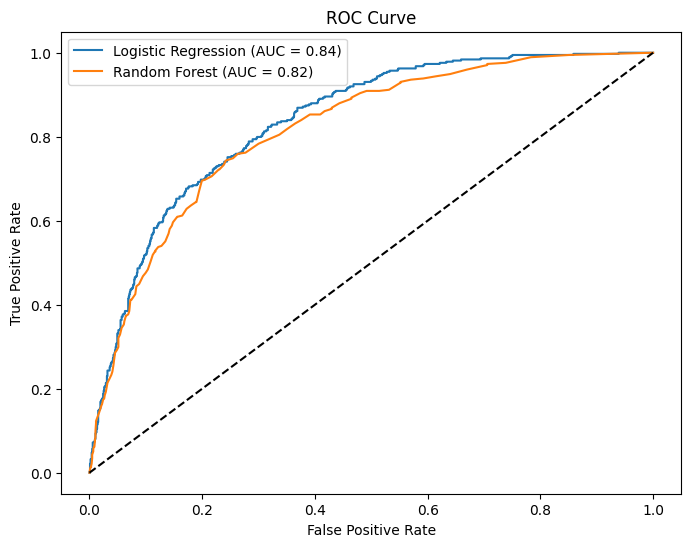

In [23]:
# 9.4 ROC Curve & AUC Score

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilities
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_lr)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob_rf)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [24]:
# Feature Importance (For Random Forest)

import pandas as pd
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(feature_importances.head(10))



Top 10 Important Features:
TotalCharges                      0.191435
tenure                            0.171020
MonthlyCharges                    0.168400
InternetService_Fiber optic       0.039481
PaymentMethod_Electronic check    0.037416
Contract_Two year                 0.030529
gender_Male                       0.029332
OnlineSecurity_Yes                0.028157
PaperlessBilling_Yes              0.025536
TechSupport_Yes                   0.024114
dtype: float64


In [31]:
# Comapring both model for final model selection.

from sklearn.metrics import roc_auc_score
import pandas as pd

# Calculate AUC dynamically
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Store previously calculated metrics for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg.predict(X_test))
log_reg_precision = precision_score(y_test, log_reg.predict(X_test))
log_reg_recall = recall_score(y_test, log_reg.predict(X_test))
log_reg_f1 = f1_score(y_test, log_reg.predict(X_test))

# Store previously calculated metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_precision = precision_score(y_test, rf.predict(X_test))
rf_recall = recall_score(y_test, rf.predict(X_test))
rf_f1 = f1_score(y_test, rf.predict(X_test))

# Compare models in a DataFrame
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    'Logistic Regression': [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1, log_reg_auc],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc]
}

comparison_df = pd.DataFrame(metrics_data)
print("\n📊 Model Comparison Table:\n")
print(comparison_df)

# Identify best model based on AUC
best_model = 'Logistic Regression' if log_reg_auc > rf_auc else 'Random Forest'
print(f"\n✅ Final Selected Model: {best_model} (Reason: Higher AUC Score)")



📊 Model Comparison Table:

      Metric  Logistic Regression  Random Forest
0   Accuracy             0.803127       0.789623
1  Precision             0.646526       0.625806
2     Recall             0.572193       0.518717
3   F1-Score             0.607092       0.567251
4        AUC             0.836390       0.816490

✅ Final Selected Model: Logistic Regression (Reason: Higher AUC Score)


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Preprocessing (numeric & categorical)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# 2. Pipeline with Logistic Regression
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

# 3. Define hyperparameter grid
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2']
}

# 4. GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# 5. Best model and performance
print("Best Hyperparameters:", grid.best_params_)
best_model = grid.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("Test Precision:", precision_score(y_test, y_pred))
print("Test Recall   :", recall_score(y_test, y_pred))
print("Test F1       :", f1_score(y_test, y_pred))
print("Test ROC-AUC  :", roc_auc_score(y_test, y_prob))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'clf__C': 10, 'clf__penalty': 'l1'}
Test Accuracy : 0.7789623312011372
Test Precision: 0.6162361623616236
Test Recall   : 0.446524064171123
Test F1       : 0.517829457364341
Test ROC-AUC  : 0.816503253593966


In [33]:
import joblib

# Save the entire pipeline (preprocessing + classifier)
joblib.dump(best_model, 'final_logistic_model.pkl')
print("✅ Model saved as 'final_logistic_model.pkl'")


✅ Model saved as 'final_logistic_model.pkl'


In [36]:
import pandas as pd
import joblib

# Load the saved model
loaded_model = joblib.load('final_logistic_model.pkl')
print("✅ Model loaded successfully!")

# ----- 1. Ask user for input -----
tenure = float(input("Enter tenure (months): "))
monthly_charges = float(input("Enter Monthly Charges: "))
total_charges = float(input("Enter Total Charges: "))
senior_citizen = int(input("Enter Senior Citizen (0 = No, 1 = Yes): "))
contract = input("Enter Contract type (Month-to-month / One year / Two year): ")
internet_service = input("Enter Internet Service (DSL / Fiber optic / None): ")

# ----- 2. Create a DataFrame from input -----
user_input = pd.DataFrame([{
    'tenure': tenure,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'SeniorCitizen': senior_citizen,
    'Contract': contract,
    'InternetService': internet_service
}])

# ----- 3. Predict churn -----
churn_prob = loaded_model.predict_proba(user_input)[:, 1]  # probability of churn
churn_pred = loaded_model.predict(user_input)             # 0 = no churn, 1 = churn

# ----- 4. Show results -----
user_input['Churn_Probability'] = churn_prob
user_input['Churn_Prediction'] = churn_pred

print("\n📊 Churn Prediction Result:")
print(user_input)


✅ Model loaded successfully!
Enter tenure (months): 8
Enter Monthly Charges: 53
Enter Total Charges: 222
Enter Senior Citizen (0 = No, 1 = Yes): 0
Enter Contract type (Month-to-month / One year / Two year): One year
Enter Internet Service (DSL / Fiber optic / None): None

📊 Churn Prediction Result:
   tenure  MonthlyCharges  TotalCharges  SeniorCitizen  Contract  \
0     8.0            53.0         222.0              0  One year   

  InternetService  Churn_Probability  Churn_Prediction  
0            None           0.356318             False  
